# Mobile Range Prediction & Recommendation System

## 0 Introduction to the Business Context and Dataset

### Business Context
Nowadays, there exist many different tech-related websites providing latest information about any new stuff in the market. They may have different specialities, for example some are mainly about hardwares, suitable for who want to build a PC himself, and others provide similar kind of reviews or buying guides for mobile phones. We notice that although these kind of websites expertise at different areas, most of them aim at helping users find their ideal products based on their needs, which is a feature improved a lot in recent years thanks to the implementation of machine learning algorithms.

Suppose we are a bunch of media workers and want to set up a tech website similar to CNET or TechRadar, which provides configuration and price information for mobiles. To make it competitive in the market, we decide to implement a similar kind of algorithm inside to recommend phones users might be interested in.

We foresee there're two kind of users :

 - **Group 1**: These users already had an ideal combination of configurations, we suggest the estimated price range for him.

 - **Group 2**: Theses user knows nothing too specific about mobiles but somehow have one favorite product (e.g. simply attracted by Ads), we provide him with similar products.

Our goals are:
 - Build a Classification model which is suitable to classify mobiles into different price ranges using their configuration information, to saitify the first group of users.
 - Build a recommendation system to satisfy the second group of users.

### About the Dataset
**Link to the dataset**: https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices/

This dataset contains data scraped and preprocessed from Gadgets360's website, containing detailed information about configurations and prices of different mobile phone models in Indian market. The prices are shown in Indian Rupee.

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("..\\data\\ndtv_data_final.csv", index_col=0)

## 1. Data Wrangling

### 1.1 Preview of Dataset and Usability Check 

Before our intended analysis is performed, it's essential to have an usability check of the dataset to ensure it doesn't have the problem of missing values, duplicated values and outliers, starting with preview of the data.

In [34]:
# Show the first 5 row of dataset
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,256.0,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,64.0,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,128.0,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [35]:
# Show the number of rows and columns
df.shape

(1359, 21)

In [36]:
# Set max rows and columns to display everything
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [37]:
# Check columns and potential missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   objec

From the information above we can guarantee that the dataset doesn't have any missing values. Then another check will be performed for duplicated rows in below.

In [38]:
# Check duplicated entries
df.duplicated().value_counts()

False    1359
Name: count, dtype: int64

As no duplicated entry is found, we decide to find if there's any outlier by observing descriptive statistics about numeric variables.

In [39]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


From the descriptive statistics above, we conclude that this dataset have good usability, suitable for machine learning model training and testing.

### 1.2 Data Transformation

The price in INR will be transformed into USD first for better and a more general interpretation, according to a currency 1 USD = 0.011 INR

In [40]:
df["Price (USD)"] = round(df.Price*0.011).astype(int)
df.drop(["Price"], axis=1, inplace=True)


RAM and Internal Storage are in different units, currently Gigabytes (GB) is the most widely used option to measure ROM and RAM. The `RAM (MB)` will be transformed into GB.

In [41]:
df["RAM (GB)"] = round(df["RAM (MB)"]/1000, 2)
df.drop(["RAM (MB)"], axis=1, inplace=True)

For binary variables in the dataset, "Yes/No" will follow the common practice in machine learning and be processed into "0/1" for better performance in model training

In [42]:
binaryVariableList = list()

for x in df.columns:
    if df[x].value_counts().index.to_list() == ['Yes', 'No']:
        binaryVariableList.append(x)

for x in binaryVariableList:
    df[x]=df[x].map({"Yes": 1, "No":0})

# Check for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   int64  
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   Internal storage (GB)   1359 non-null   float64
 10  Rear camera             1359 non-null   float64
 11  Front camera            1359 non-null   float64
 12  Operating system        1359 non-null   object 
 13  Wi-Fi                   1359 non-null   int64  
 14  Bluetooth               1359 non-null   int64

This data set seperates the resolution of models into `Resolution x` and `Resolution y` instead of the true number of pixels, which is understandable because using the true resolution results in very large numbers. However, it might not fully reflect the quality of display as we can foresee that when a large screen device shares the same resolution as small one, the display quality will drop.

A common practice in the industry is to measure "Pixel per inch (PPI)" along diagonal, and normally higher PPI leads to better display quality. For this reason, we decide to add a new PPI variable.

In [43]:
# Add new column
df["Pixel per inch (PPI)"] = np.sqrt((df["Resolution x"]**2 + df["Resolution y"]**2))/df["Screen size (inches)"]
df["Pixel per inch (PPI)"] = df["Pixel per inch (PPI)"].round(2)

df[["Name", "Screen size (inches)", "Resolution x", "Resolution y", "Pixel per inch (PPI)"]].head()

,Name,Screen size (inches),Resolution x,Resolution y,Pixel per inch (PPI)
0,OnePlus 7T Pro McLaren Edition,6.67,1440,3120,515.18
1,Realme X2 Pro,6.50,1080,2400,404.89
2,iPhone 11 Pro Max,6.50,1242,2688,455.55
3,iPhone 11,6.10,828,1792,323.61
4,LG G8X ThinQ,6.40,1080,2340,402.69


It is reasonable to assume brand will have an impact of price, however, there are too many brands in this dataset, making it impossible to use it as a independent variable even with target encoding technique. Finally, the decision was made to include the information of origin country of a brand under the help of external tools and information. Origin country information can serve as native clusters to enhance training process.

In [44]:
# Show the unique brands
sorted(df["Brand"].unique())

['10.or',
 'Acer',
 'Alcatel',
 'Apple',
 'Aqua',
 'Asus',
 'Billion',
 'Black Shark',
 'BlackBerry',
 'Blu',
 'Cat',
 'Celkon',
 'Comio',
 'Coolpad',
 'Gionee',
 'Google',
 'HP',
 'HTC',
 'Homtom',
 'Honor',
 'Huawei',
 'InFocus',
 'Infinix',
 'Intex',
 'Itel',
 'Jio',
 'Jivi',
 'Karbonn',
 'Kult',
 'LG',
 'Lava',
 'LeEco',
 'Lenovo',
 'Lephone',
 'Lyf',
 'M-tech',
 'Meizu',
 'Micromax',
 'Microsoft',
 'Mobiistar',
 'Motorola',
 'Nokia',
 'Nubia',
 'Nuu Mobile',
 'OnePlus',
 'Onida',
 'Oppo',
 'Panasonic',
 'Phicomm',
 'Philips',
 'Poco',
 'Razer',
 'Reach',
 'Realme',
 'Samsung',
 'Sansui',
 'Smartron',
 'Sony',
 'Spice',
 'Swipe',
 'TCL',
 'Tambo',
 'Tecno',
 'Videocon',
 'Vivo',
 'Xiaomi',
 'Xolo',
 'Yu',
 'ZTE',
 'Zen',
 'Ziox',
 'Zopo',
 'Zuk',
 'iBall',
 'iVoomi',
 'mPhone']

In [45]:
# Map brands to country
brands_by_country = {
    "USA": ["Apple", "Google", "HP", "Microsoft", "Razer", "Cat", "Blu", "BlackBerry", "Motorola", "Nuu Mobile"],
    "South Korea": ["Samsung", "LG"],
    "China": ["10.or", "Black Shark", "Coolpad", "Gionee", "Honor", "Huawei", "Lenovo", "Meizu", "Nubia", "OnePlus", "Oppo", "Realme", "Vivo", "Xiaomi", "ZTE", "Zopo", "Phicomm", "Zuk", "LeEco", "Homtom", "Poco", "Sansui", "TCL"],
    "Taiwan": ["Acer", "Asus", "HTC"],
    "Japan": ["Sony", "Panasonic", "Sharp"],
    "India": ["Aqua", "Billion", "Celkon", "Comio", "InFocus", "Intex", "Itel", "Jio", "Jivi", "Karbonn", "Kult", "Lava", "Lephone", "Lyf", "M-tech", "Micromax", "Mobiistar", "Onida", "Reach", "Smartron", "Spice", "Swipe", "Tambo", "Videocon", "Xolo", "Yu", "Zen", "Ziox", "mPhone", "iBall", "iVoomi"],
    "EU": ["Nokia", "Alcatel","Gigaset", "Philips"],
    "Hong Kong": ["Infinix", "Tecno", "Itel"],
}

# Reverse the keys and values in the dictionary
brand_to_country = {}
for country, brands in brands_by_country.items():
    for brand in brands:
        brand_to_country[brand] = country

# Map them to the dataset
df["Brand Origin"] = df["Brand"].map(brand_to_country)
df[["Name", "Brand", "Brand Origin"]].head(5)

,Name,Brand,Brand Origin
0,OnePlus 7T Pro McLaren Edition,OnePlus,China
1,Realme X2 Pro,Realme,China
2,iPhone 11 Pro Max,Apple,USA
3,iPhone 11,Apple,USA
4,LG G8X ThinQ,LG,South Korea


Another information might help reflect the characteristic of one brand is the price of the most expensive model in the market. By this way we can use numeric variable to represent a brand's positioning.

In [46]:
topPrice = dict()
for x in df["Brand"].unique():
    topPrice[x] = df[df["Brand"] == x]["Price (USD)"].max()

df["Brand Top Price"] = df["Brand"].map(topPrice)

df[["Name", "Brand", "Brand Origin", "Brand Top Price", "Price (USD)"]].head(10)

,Name,Brand,Brand Origin,Brand Top Price,Price (USD)
0,OnePlus 7T Pro McLaren Edition,OnePlus,China,649,649
1,Realme X2 Pro,Realme,China,308,308
2,iPhone 11 Pro Max,Apple,USA,1176,1176
3,iPhone 11,Apple,USA,1176,692
4,LG G8X ThinQ,LG,South Korea,550,550
5,OnePlus 7T,OnePlus,China,649,384
6,OnePlus 7T Pro,OnePlus,China,649,583
7,Samsung Galaxy Note 10+,Samsung,South Korea,1925,877
8,Asus ROG Phone 2,Asus,Taiwan,770,418
9,Xiaomi Redmi K20 Pro,Xiaomi,China,330,255


Next thing is to cut the continuous `Price` variable into several bins, representing different "Price Range", as our model is not intended for predicting the exact price of a mobile model. According to external information, usually mobile phone market has following price range:

 - **Ultra Budget**: < 100 USD

 - **Budget**: 100-250 USD

 - **Mid Range**: 250-400 USD

 - **Upper Mid**: 400-700 USD

 - **Premium**: 700-1000 USD

 - **Flagship**: > 1000 USD

According this information, we categorize prices into price range.

In [47]:
# Setting price ranges
priceRangeLabel = ["Ultra Budget", "Budget", "Mid Range", "Upper Mid", "Premium", "Flagship"]
priceRangeBins = [0, 100, 250, 400, 700, 1000, np.inf]
df["Price Range"] = pd.cut(df["Price (USD)"], bins=priceRangeBins, labels=priceRangeLabel)

df[["Name", "Brand", "Brand Origin", "Brand Top Price", "Price (USD)", "Price Range"]].head(10)

,Name,Brand,Brand Origin,Brand Top Price,Price (USD),Price Range
0,OnePlus 7T Pro McLaren Edition,OnePlus,China,649,649,Upper Mid
1,Realme X2 Pro,Realme,China,308,308,Mid Range
2,iPhone 11 Pro Max,Apple,USA,1176,1176,Flagship
3,iPhone 11,Apple,USA,1176,692,Upper Mid
4,LG G8X ThinQ,LG,South Korea,550,550,Upper Mid
5,OnePlus 7T,OnePlus,China,649,384,Mid Range
6,OnePlus 7T Pro,OnePlus,China,649,583,Upper Mid
7,Samsung Galaxy Note 10+,Samsung,South Korea,1925,877,Premium
8,Asus ROG Phone 2,Asus,Taiwan,770,418,Upper Mid
9,Xiaomi Redmi K20 Pro,Xiaomi,China,330,255,Mid Range


Finally, the order of new columns is adjusted and the information of dataset after transformation is shown below

In [58]:
columnsSorted = ['Name',
    'Brand',
    'Brand Origin',
    'Brand Top Price',
    'Model',
    'Battery capacity (mAh)',
    'Touchscreen',
    'Resolution x',
    'Resolution y',
    'Screen size (inches)',
    'Pixel per inch (PPI)',
    'Processor',
    'RAM (GB)',
    'Internal storage (GB)',
    'Rear camera',
    'Front camera',
    'Operating system',
    'Wi-Fi',
    'Bluetooth',
    'GPS',
    'Number of SIMs',
    '3G',
    '4G/ LTE',
    'Price (USD)',
    'Price Range']

df=df[columnsSorted]

In [59]:
df.head()

,Name,Brand,Brand Origin,Brand Top Price,Model,Battery capacity (mAh),Touchscreen,Resolution x,Resolution y,Screen size (inches),Pixel per inch (PPI),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD),Price Range
0,OnePlus 7T Pro McLaren Edition,OnePlus,China,649,7T Pro McLaren Edition,4085,1,1440,3120,6.67,515.18,8,12.0,256.0,48.0,16.0,Android,1,1,1,2,1,1,649,Upper Mid
1,Realme X2 Pro,Realme,China,308,X2 Pro,4000,1,1080,2400,6.50,404.89,8,6.0,64.0,64.0,16.0,Android,1,1,1,2,1,1,308,Mid Range
2,iPhone 11 Pro Max,Apple,USA,1176,iPhone 11 Pro Max,3969,1,1242,2688,6.50,455.55,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,1176,Flagship
3,iPhone 11,Apple,USA,1176,iPhone 11,3110,1,828,1792,6.10,323.61,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,692,Upper Mid
4,LG G8X ThinQ,LG,South Korea,550,G8X ThinQ,4000,1,1080,2340,6.40,402.69,8,6.0,128.0,12.0,32.0,Android,1,1,1,1,0,0,550,Upper Mid


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Name                    1359 non-null   object  
 1   Brand                   1359 non-null   object  
 2   Brand Origin            1359 non-null   object  
 3   Brand Top Price         1359 non-null   int64   
 4   Model                   1359 non-null   object  
 5   Battery capacity (mAh)  1359 non-null   int64   
 6   Touchscreen             1359 non-null   int64   
 7   Resolution x            1359 non-null   int64   
 8   Resolution y            1359 non-null   int64   
 9   Screen size (inches)    1359 non-null   float64 
 10  Pixel per inch (PPI)    1359 non-null   float64 
 11  Processor               1359 non-null   int64   
 12  RAM (GB)                1359 non-null   float64 
 13  Internal storage (GB)   1359 non-null   float64 
 14  Rear camera             1359 

In [50]:
df.head(5)

,Name,Brand,Brand Origin,Brand Top Price,Model,Battery capacity (mAh),Touchscreen,Resolution x,Resolution y,Screen size (inches),Pixel per inch (PPI),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD),Price Range
0,OnePlus 7T Pro McLaren Edition,OnePlus,China,649,7T Pro McLaren Edition,4085,1,1440,3120,6.67,515.18,8,12.0,256.0,48.0,16.0,Android,1,1,1,2,1,1,649,Upper Mid
1,Realme X2 Pro,Realme,China,308,X2 Pro,4000,1,1080,2400,6.50,404.89,8,6.0,64.0,64.0,16.0,Android,1,1,1,2,1,1,308,Mid Range
2,iPhone 11 Pro Max,Apple,USA,1176,iPhone 11 Pro Max,3969,1,1242,2688,6.50,455.55,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,1176,Flagship
3,iPhone 11,Apple,USA,1176,iPhone 11,3110,1,828,1792,6.10,323.61,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,692,Upper Mid
4,LG G8X ThinQ,LG,South Korea,550,G8X ThinQ,4000,1,1080,2340,6.40,402.69,8,6.0,128.0,12.0,32.0,Android,1,1,1,1,0,0,550,Upper Mid


## 2. Exploratory Data Analysis

### 2.1 Single Variable Visualization

Checking the distribution of our target variable `Price Range` and also the actual price `Price (USD)` is fundamental, because this will provide extra information about our "classes". Weighting or other methods will need to be introduced when training the model if a highly skewed or unbalanced distribution shows up,.

Text(0.5, 1.0, 'Bar Chart of Price Range')

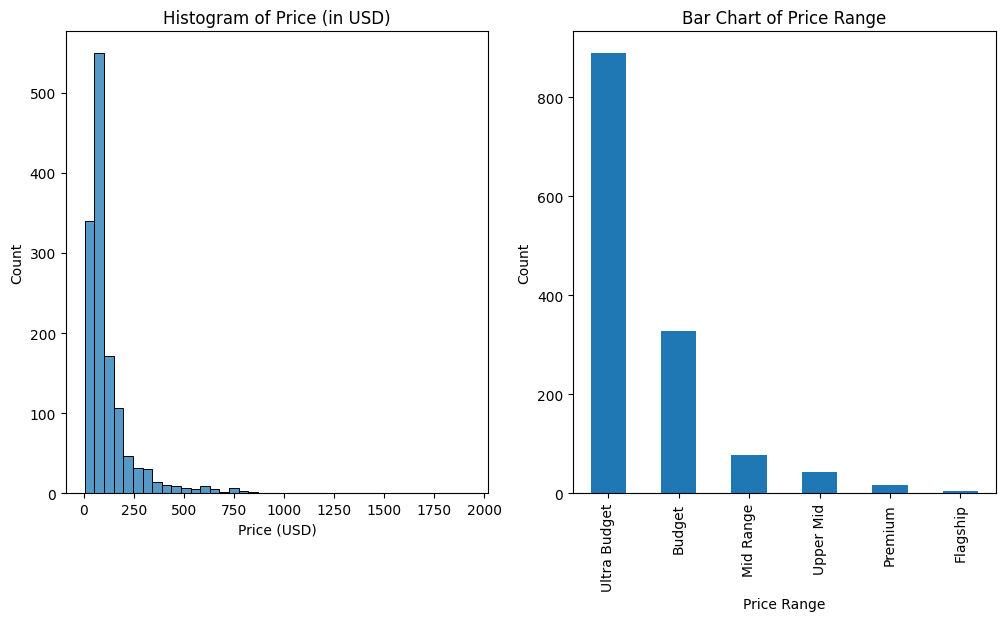

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Plot Histogram of Price
sns.histplot(data=df, x="Price (USD)", ax=axs[0], bins=40)
axs[0].set_xlabel("Price (USD)")
axs[0].set_ylabel("Count")
axs[0].set_title ("Histogram of Price (in USD)")

# Plot Bar Chart of Price Range
df["Price Range"].value_counts().plot(x="Price Range", kind='bar', ax=axs[1])
axs[1].set_xlabel("Price Range")
axs[1].set_ylabel("Count")
axs[1].set_title("Bar Chart of Price Range")

From this two plots, it's reasonable to conclude that **Price** is not normally distributed in this dataset, most of the entries are in the "Ultra Budget" and "Budget" range. The number of phones start to have a sharp decrease starting from "Mid Range". Therefore, special adjustments need to be done in model training to compensate the unbalanced proportion of target classes.

We are also interested in plotting Histogram for other continuous numeric variables such as `Battery capacity (mAh)`, `Rear camera`, `Front camera` etc. If some of them share a similar pattern to the `Price`, then they will be considered as strong factors to classify mobiles.

Text(0.5, 1.0, 'Histogram of Rear Camera (Megapixels)')

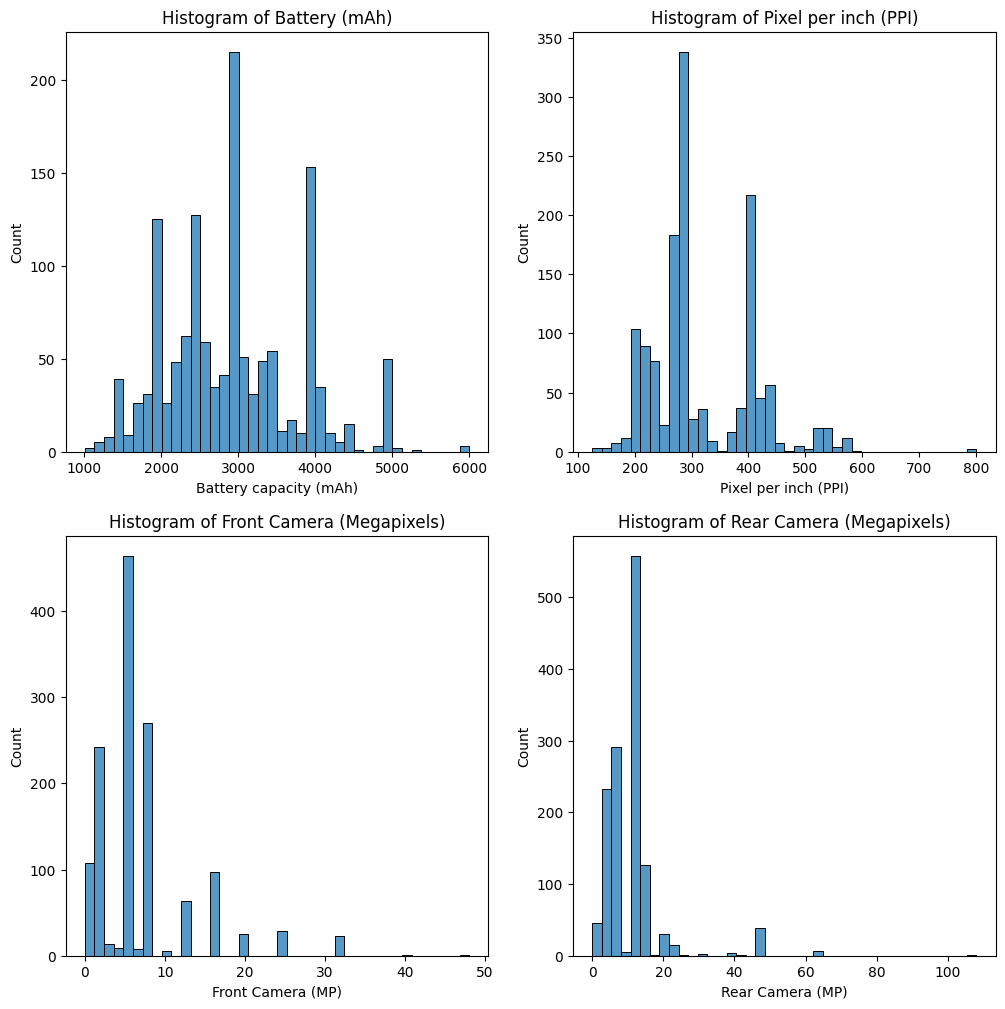

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

for c, l in zip(["Battery capacity (mAh)", "Pixel per inch (PPI)","Front camera", "Rear camera"], [[0, 0], [0, 1], [1, 0], [1, 1]]):
    sns.histplot(data=df, x=c, ax=axs[l[0], l[1]], bins=40)
    axs[l[0], l[1]].set_ylabel("Count")

axs[0, 0].set_xlabel("Battery capacity (mAh)")
axs[0, 1].set_xlabel("Pixel per inch (PPI)")
axs[1, 0].set_xlabel("Front Camera (MP)")
axs[1, 1].set_xlabel("Rear Camera (MP)")

axs[0, 0].set_title ("Histogram of Battery (mAh)")
axs[0, 1].set_title ("Histogram of Pixel per inch (PPI)")
axs[1, 0].set_title ("Histogram of Front Camera (Megapixels)")
axs[1, 1].set_title ("Histogram of Rear Camera (Megapixels)")


Our main observation from histograms is that the distributions of these variables tend to peak after a regular interval. The phenomenon is most obvious on Battery and PPI. From the perspective of reality, hardwares such as screen, battery and camera usually come from certain providers, instead of being developed by the brands themselves and there are surely some popular solutions in the market and most brands will settle on it.

Besides, cameras shows similar distribution as price. It's usual that budget products can still aim at larger batteries, but they are unlikely to be matched with better cameras.

Moving on to discrete variables, they are configurations that only have several available options in the market such as `RAM (GB)`, `Internal storage (GB)` and `Processor` and one attribute `Brand Origin` that is used to describe the brand image. They are suitable for bar charts

Text(0.5, 1.0, 'Bar Chart of Brand Origin')

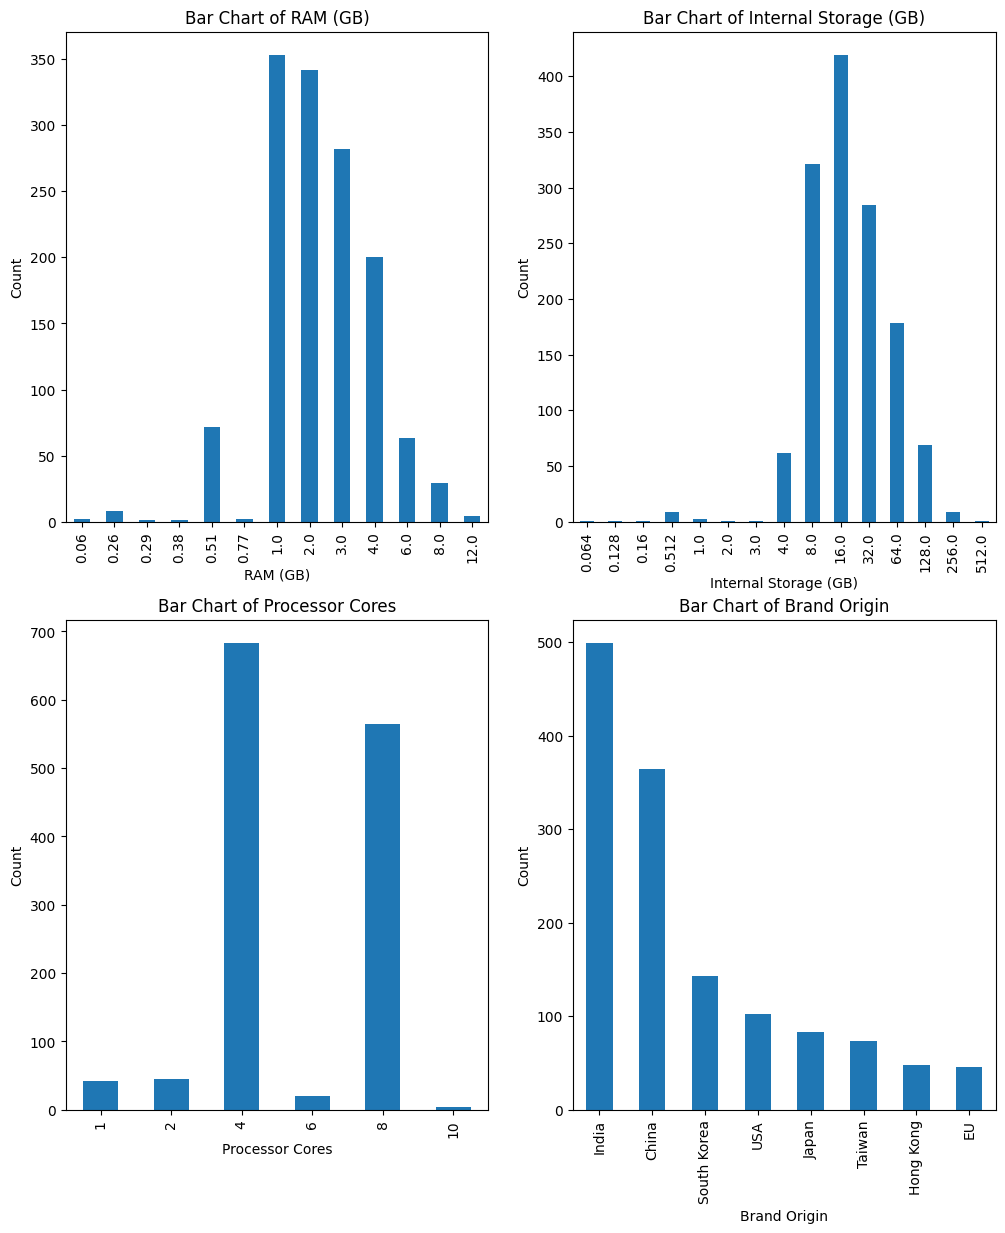

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(12,14))

# Discrete Numerical
for c, l in zip(["RAM (GB)", "Internal storage (GB)","Processor"], [[0, 0], [0, 1], [1, 0]]):
    df[c].value_counts().sort_index().plot(kind="bar", ax=axs[l[0], l[1]])
    axs[l[0], l[1]].set_ylabel("Count")

axs[0, 0].set_xlabel("RAM (GB)")
axs[0, 1].set_xlabel("Internal Storage (GB)")
axs[1, 0].set_xlabel("Processor Cores")

axs[0, 0].set_title ("Bar Chart of RAM (GB)")
axs[0, 1].set_title ("Bar Chart of Internal Storage (GB)")
axs[1, 0].set_title ("Bar Chart of Processor Cores")


# Categorical
df["Brand Origin"].value_counts().plot(kind="bar", ax=axs[1, 1])
axs[1, 1].set_xlabel("Brand Origin")
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_title ("Bar Chart of Brand Origin")

Compared to `RAM (GB)`, `Internal storage (GB)` is more normally distributed because the number of phones having RAM under 1GB is relatively smaller than those having RAM more than 1GB. Moreover, 4-Cores CPU and 8-Cores CPU are most common in the market.

For the only categorical variable `Brand Origin`, India has a dominant position in the dataset, followed by China. The rest of countries/regions only have a lineup of mobile models under 200.

### 2.2 Multivaraite Visualization

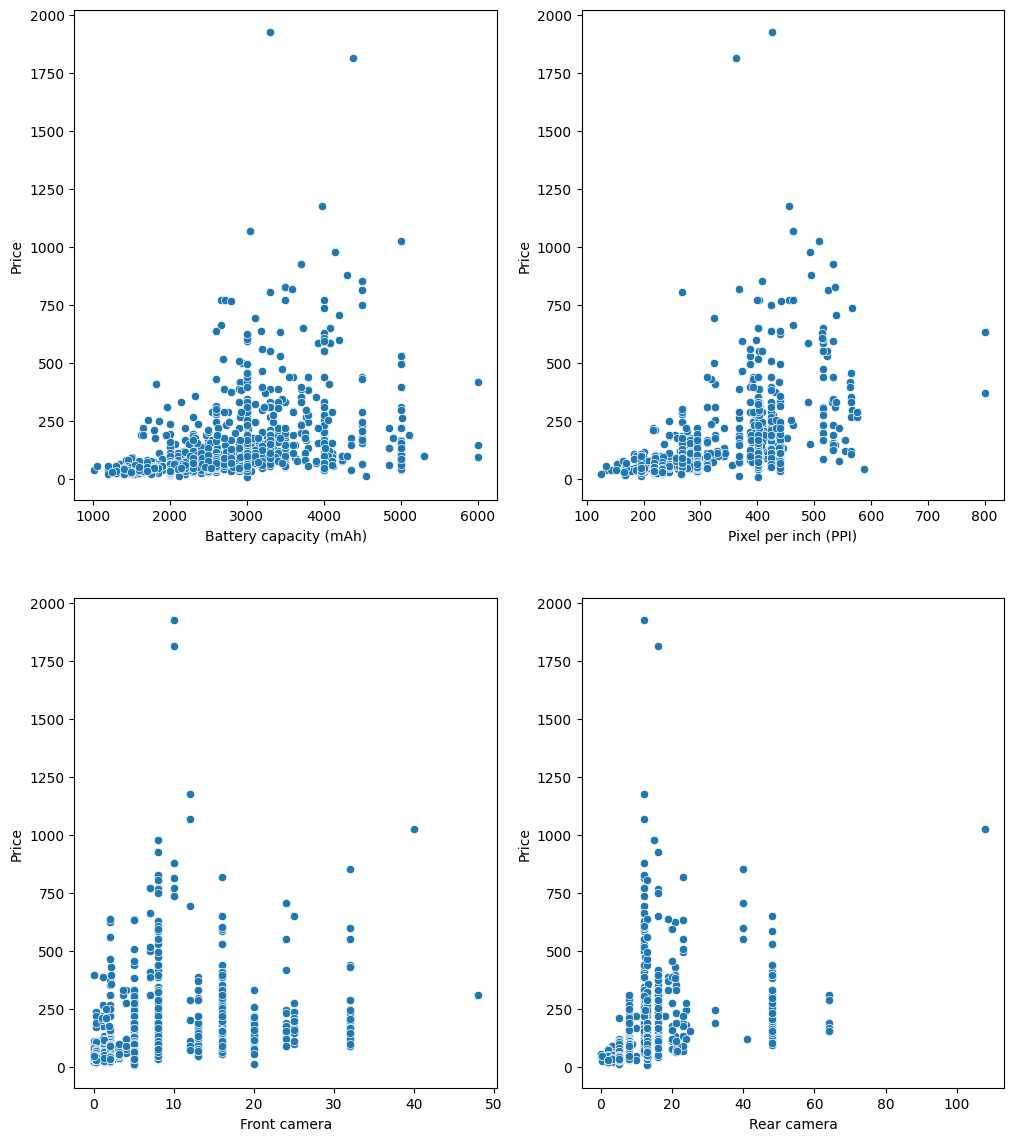

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(12,14))

# Discrete Numerical
for c, l in zip(["Battery capacity (mAh)", "Pixel per inch (PPI)","Front camera", "Rear camera"], [[0, 0], [0, 1], [1, 0], [1, 1]]):
    sns.scatterplot(data=df, x=c, y="Price (USD)", ax=axs[l[0], l[1]])
    axs[l[0], l[1]].set_ylabel("Price")

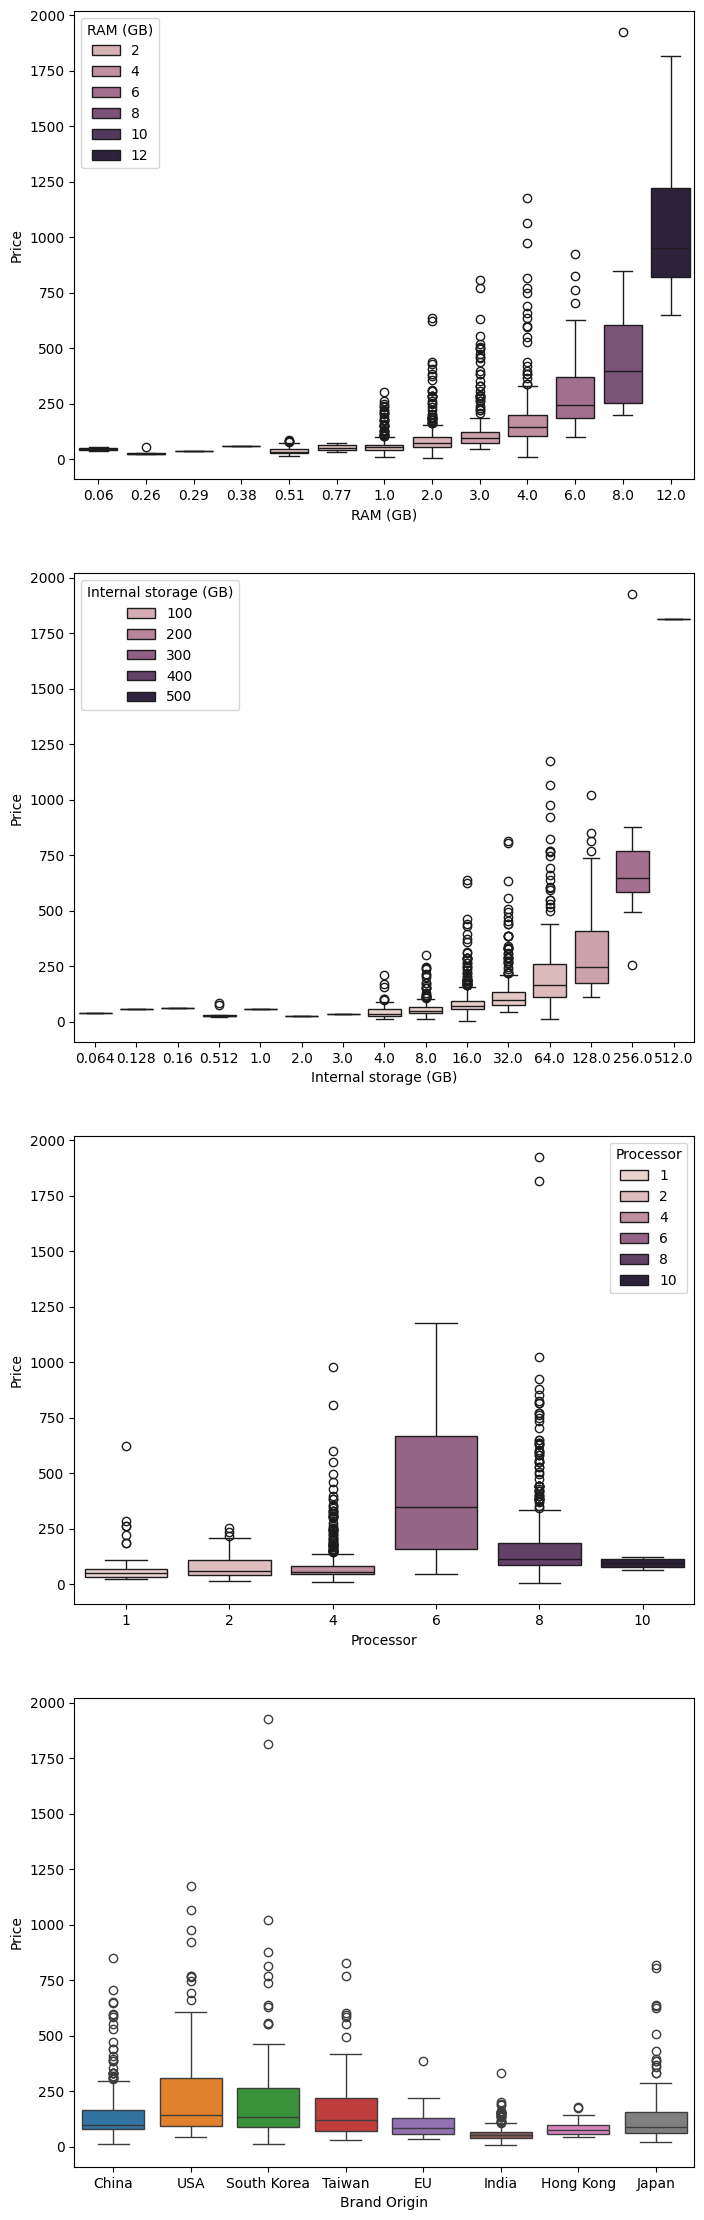

In [55]:
fig, axs = plt.subplots(4, 1, figsize=(8,28))

# Discrete Numerical
for c, l in zip(["RAM (GB)", "Internal storage (GB)","Processor", "Brand Origin"], [0, 1, 2, 3]):
    sns.boxplot(data=df, x=c, y="Price (USD)", hue=c, ax=axs[l])
    axs[l].set_ylabel("Price")

In [56]:
# Modelling

In [63]:
df.head()

,Name,Brand,Brand Origin,Brand Top Price,Model,Battery capacity (mAh),Touchscreen,Resolution x,Resolution y,Screen size (inches),Pixel per inch (PPI),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD),Price Range
0,OnePlus 7T Pro McLaren Edition,OnePlus,China,649,7T Pro McLaren Edition,4085,1,1440,3120,6.67,515.18,8,12.0,256.0,48.0,16.0,Android,1,1,1,2,1,1,649,Upper Mid
1,Realme X2 Pro,Realme,China,308,X2 Pro,4000,1,1080,2400,6.50,404.89,8,6.0,64.0,64.0,16.0,Android,1,1,1,2,1,1,308,Mid Range
2,iPhone 11 Pro Max,Apple,USA,1176,iPhone 11 Pro Max,3969,1,1242,2688,6.50,455.55,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,1176,Flagship
3,iPhone 11,Apple,USA,1176,iPhone 11,3110,1,828,1792,6.10,323.61,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,692,Upper Mid
4,LG G8X ThinQ,LG,South Korea,550,G8X ThinQ,4000,1,1080,2340,6.40,402.69,8,6.0,128.0,12.0,32.0,Android,1,1,1,1,0,0,550,Upper Mid


In [ ]:
to_use_in_model = [
    'Name',
    'Brand Origin',
    'Brand Top Price',
    'Battery capacity (mAh)',
    'Touchscreen',
    'Resolution x',
    'Resolution y',
    'Screen size (inches)',
    'Pixel per inch (PPI)',
    'Processor',
    'RAM (GB)',
    'Internal storage (GB)',
    'Rear camera',
    'Front camera',
    'Operating system',
    'Wi-Fi',
    'Bluetooth',
    'GPS',
    'Number of SIMs',
    '3G',
    '4G/ LTE',
    'Price (USD)',
    'Price Range'
]


In [67]:
df.head()

,Name,Brand,Brand Top Price,Model,Battery capacity (mAh),Touchscreen,Resolution x,Resolution y,Screen size (inches),Pixel per inch (PPI),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD),Price Range,Brand Origin_EU,Brand Origin_Hong Kong,Brand Origin_India,Brand Origin_Japan,Brand Origin_South Korea,Brand Origin_Taiwan,Brand Origin_USA,Operating system_Mac,Operating system_Other,Operating system_Windows,Camera Score,Performance Score,Battery-to-Screen Ratio
0,OnePlus 7T Pro McLaren Edition,OnePlus,649,7T Pro McLaren Edition,4085,1,1440,3120,6.67,515.18,8,12.0,256.0,48.0,16.0,1,1,1,2,1,1,649,2.0,False,False,False,False,False,False,False,False,False,False,64.0,28.0,612.443778
1,Realme X2 Pro,Realme,308,X2 Pro,4000,1,1080,2400,6.50,404.89,8,6.0,64.0,64.0,16.0,1,1,1,2,1,1,308,1.0,False,False,False,False,False,False,False,False,False,False,80.0,13.0,615.384615
2,iPhone 11 Pro Max,Apple,1176,iPhone 11 Pro Max,3969,1,1242,2688,6.50,455.55,6,4.0,64.0,12.0,12.0,1,1,1,2,1,1,1176,3.0,False,False,False,False,False,False,True,True,False,False,24.0,9.0,610.615385
3,iPhone 11,Apple,1176,iPhone 11,3110,1,828,1792,6.10,323.61,6,4.0,64.0,12.0,12.0,1,1,1,2,1,1,692,2.0,False,False,False,False,False,False,True,True,False,False,24.0,9.0,509.836066
4,LG G8X ThinQ,LG,550,G8X ThinQ,4000,1,1080,2340,6.40,402.69,8,6.0,128.0,12.0,32.0,1,1,1,1,0,0,550,2.0,False,False,False,False,True,False,False,False,False,False,44.0,14.0,625.000000


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

df = pd.read_csv("..\\data\\ndtv_data_final.csv", index_col=0) 

# --- Step 0: Integrate Guo Transformation ---
# Change Price to USD
df["Price (USD)"] = round(df.Price*0.011).astype(int)
df.drop(["Price"], axis=1, inplace=True)

# Change RAM to GB
df["RAM (GB)"] = round(df["RAM (MB)"]/1000, 2)
df.drop(["RAM (MB)"], axis=1, inplace=True)

# Binary Variables
binaryVariableList = list()

for x in df.columns:
    if df[x].value_counts().index.to_list() == ['Yes', 'No']:
        binaryVariableList.append(x)

for x in binaryVariableList:
    df[x]=df[x].map({"Yes": 1, "No":0})

# Pixel
df["Pixel per inch (PPI)"] = np.sqrt((df["Resolution x"]**2 + df["Resolution y"]**2))/df["Screen size (inches)"]
df["Pixel per inch (PPI)"] = df["Pixel per inch (PPI)"].round(2)

# Brand help
brands_by_country = {
    "USA": ["Apple", "Google", "HP", "Microsoft", "Razer", "Cat", "Blu", "BlackBerry", "Motorola", "Nuu Mobile"],
    "South Korea": ["Samsung", "LG"],
    "China": ["10.or", "Black Shark", "Coolpad", "Gionee", "Honor", "Huawei", "Lenovo", "Meizu", "Nubia", "OnePlus", "Oppo", "Realme", "Vivo", "Xiaomi", "ZTE", "Zopo", "Phicomm", "Zuk", "LeEco", "Homtom", "Poco", "Sansui", "TCL"],
    "Taiwan": ["Acer", "Asus", "HTC"],
    "Japan": ["Sony", "Panasonic", "Sharp"],
    "India": ["Aqua", "Billion", "Celkon", "Comio", "InFocus", "Intex", "Itel", "Jio", "Jivi", "Karbonn", "Kult", "Lava", "Lephone", "Lyf", "M-tech", "Micromax", "Mobiistar", "Onida", "Reach", "Smartron", "Spice", "Swipe", "Tambo", "Videocon", "Xolo", "Yu", "Zen", "Ziox", "mPhone", "iBall", "iVoomi"],
    "EU": ["Nokia", "Alcatel","Gigaset", "Philips"],
    "Hong Kong": ["Infinix", "Tecno", "Itel"],
}

# branc top price
topPrice = dict()
for x in df["Brand"].unique():
    topPrice[x] = df[df["Brand"] == x]["Price (USD)"].max()

df["Brand Top Price"] = df["Brand"].map(topPrice)


# Reverse the keys and values in the dictionary
brand_to_country = {}
for country, brands in brands_by_country.items():
    for brand in brands:
        brand_to_country[brand] = country

# Map them to the dataset
df["Brand Origin"] = df["Brand"].map(brand_to_country)

# Setting price ranges
priceRangeLabel = ["Ultra Budget", "Budget", "Mid Range", "Upper Mid", "Premium", "Flagship"]
priceRangeBins = [0, 100, 250, 400, 700, 1000, np.inf]
df["Price Range"] = pd.cut(df["Price (USD)"], bins=priceRangeBins, labels=priceRangeLabel)

# --- Step 1: Encode Operating System ---
def categorize_os(os):
    os = os.lower()
    if 'android' in os:
        return 'Android'
    elif 'windows' in os:
        return 'Windows'
    elif 'mac' in os or 'ios' in os:
        return 'Mac'
    else:
        return 'Other'

df['Operating system'] = df['Operating system'].apply(categorize_os)

# --- Step 2: One-Hot Encode Nominal Data (Brand Origin & Operating System) --- 
# df = pd.get_dummies(df, columns=['Brand Origin', 'Operating system'], drop_first=True) -- Uncommet if needed

# --- Step 3: Convert Price Range into Ordinal Encoding ---
price_range_mapping = {
    'Entry Level': 0,
    'Mid Range': 1,
    'Upper Mid': 2,
    'Flagship': 3
}
df['Price Range'] = df['Price Range'].map(price_range_mapping)

# --- Step 4: Create Interaction Terms ---
df['Camera Score'] = df['Rear camera'] + df['Front camera']
df['Performance Score'] = (df['RAM (GB)'] * 2) + (df['Internal storage (GB)'] / 64)
df['Battery-to-Screen Ratio'] = df['Battery capacity (mAh)'] / df['Screen size (inches)']

# --- Step 5: Normalize and Standardize Numerical Values ---
# Identify numerical columns
numerical_cols = [
    'Brand Top Price', 'Battery capacity (mAh)', 'Resolution x', 'Resolution y',
    'Screen size (inches)', 'Pixel per inch (PPI)', 'RAM (GB)', 'Internal storage (GB)',
    'Rear camera', 'Front camera', 'Number of SIMs', 'Price (USD)',
    'Camera Score', 'Performance Score', 'Battery-to-Screen Ratio'
]

# Standardization (Z-score normalization)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



Price Range                1.000000
Price (USD)                0.802427
Internal storage (GB)      0.369441
Performance Score          0.323823
RAM (GB)                   0.300437
Brand Top Price            0.253326
Screen size (inches)       0.238057
Battery capacity (mAh)     0.193484
Front camera               0.163993
Resolution y               0.161131
Camera Score               0.130183
Processor                  0.117538
Battery-to-Screen Ratio    0.097111
Rear camera                0.094436
Resolution x               0.090316
Number of SIMs             0.069185
Bluetooth                  0.067316
Pixel per inch (PPI)       0.033985
GPS                        0.010199
4G/ LTE                   -0.040697
3G                        -0.044348
Touchscreen                     NaN
Wi-Fi                           NaN
Name: Price Range, dtype: float64


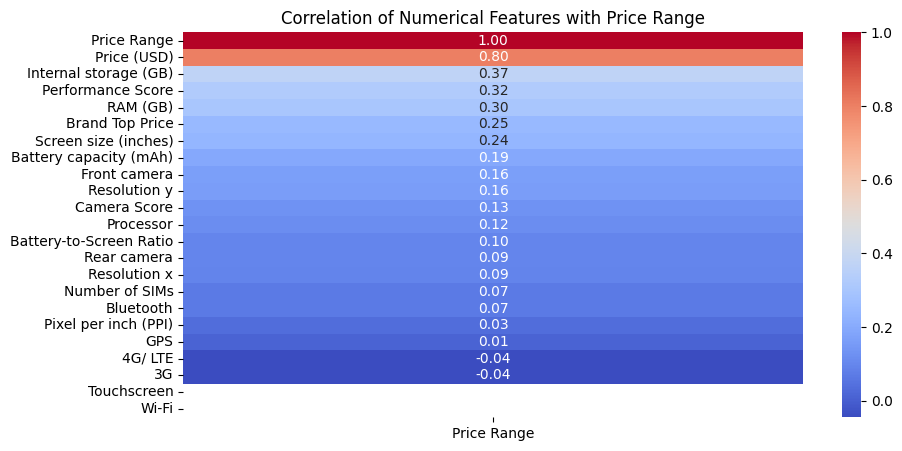

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (excluding categorical and one-hot encoded features)
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix with respect to 'Price Range'
correlation_matrix = df[numerical_cols].corr()['Price Range'].sort_values(ascending=False)

# Display correlation values
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features with Price Range")
plt.show()


## Next steps:
Now we have a variety of features and columns that we can test. We note that 

In [71]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD),RAM (GB),Pixel per inch (PPI),Brand Top Price,Brand Origin,Price Range,Camera Score,Performance Score,Battery-to-Screen Ratio
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,1.313010,2.054345,1,2.322392,2.921979,8,6.100856,4.016727,1.424097,Android,1,1,1,0.444269,1,1,3.431376,5.716170,2.202866,0.435107,China,2.0,3.242896,5.886942,0.517029
1,Realme X2 Pro,Realme,X2 Pro,1.215666,1.801033,1,0.992052,1.630673,8,0.902766,5.805427,1.424097,Android,1,1,1,0.444269,1,1,1.193702,2.110250,0.982457,-0.275222,China,1.0,4.398703,1.969911,0.540787
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,1.180164,1.801033,1,1.590705,2.147195,6,0.902766,-0.007848,0.788484,Mac,1,1,1,0.444269,1,1,6.889600,0.908277,1.543033,1.532889,USA,3.0,0.353376,0.925369,0.502257
3,iPhone 11,Apple,iPhone 11,0.196418,1.205005,1,0.060815,0.540236,6,0.902766,-0.007848,0.788484,Mac,1,1,1,0.444269,1,1,3.713546,0.908277,0.083057,1.532889,USA,2.0,0.353376,0.925369,-0.311927
4,LG G8X ThinQ,LG,G8X ThinQ,1.215666,1.652026,1,0.992052,1.523064,8,2.635462,-0.007848,3.966552,Android,1,1,1,-2.227245,0,0,2.781729,2.110250,0.958113,0.228882,South Korea,2.0,1.798136,2.231046,0.618469
